In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization,Conv1D,MaxPool1D


In [4]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
 
df['diagnosis']= label_encoder.fit_transform(df['diagnosis'])
 
df['diagnosis'].unique()

array([1, 0])

In [6]:
y=df['diagnosis']
X = df.drop(columns=['diagnosis','id','Unnamed: 32'],axis=1)

In [7]:
print(X.shape,y.shape)

(569, 30) (569,)


In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=40)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
print(X_train.shape)
print(X_test.shape)

(455, 30)
(114, 30)


In [11]:
X_train = X_train.reshape(455,30,1)
X_test = X_test.reshape(114,30,1)

In [12]:
X_train

array([[[-1.44075296],
        [-0.43531947],
        [-1.36208497],
        ...,
        [ 0.9320124 ],
        [ 2.09724217],
        [ 1.88645014]],

       [[ 1.97409619],
        [ 1.73302577],
        [ 2.09167167],
        ...,
        [ 2.6989469 ],
        [ 1.89116053],
        [ 2.49783848]],

       [[-1.39998202],
        [-1.24962228],
        [-1.34520926],
        ...,
        [-0.97023893],
        [ 0.59760192],
        [ 0.0578942 ]],

       ...,

       [[ 0.04880192],
        [-0.55500086],
        [-0.06512547],
        ...,
        [-1.23903365],
        [-0.70863864],
        [-1.27145475]],

       [[-0.03896885],
        [ 0.10207345],
        [-0.03137406],
        ...,
        [ 1.05001236],
        [ 0.43432185],
        [ 1.21336207]],

       [[-0.54860557],
        [ 0.31327591],
        [-0.60350155],
        ...,
        [-0.61102866],
        [-0.3345212 ],
        [-0.84628745]]])

In [13]:
epochs = 50

model = Sequential()
model.add(Conv1D(filters=32,kernel_size=2,activation='relu',input_shape=(30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64,kernel_size=2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 32)            96        
                                                                 
 batch_normalization (BatchN  (None, 29, 32)           128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 29, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 28, 64)            0

In [15]:
model.compile(optimizer=Adam(lr=0.00005),loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [16]:
history = model.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test))

Epoch 1/50
15/15 [==============================] - 3s 34ms/step - loss: 1.0669 - accuracy: 0.5363 - val_loss: 0.6526 - val_accuracy: 0.7895
Epoch 2/50
15/15 [==============================] - 0s 14ms/step - loss: 0.7703 - accuracy: 0.6571 - val_loss: 0.6113 - val_accuracy: 0.9123
Epoch 3/50
15/15 [==============================] - 0s 14ms/step - loss: 0.5961 - accuracy: 0.7429 - val_loss: 0.5763 - val_accuracy: 0.9298
Epoch 4/50
15/15 [==============================] - 0s 14ms/step - loss: 0.4262 - accuracy: 0.8308 - val_loss: 0.5437 - val_accuracy: 0.9298
Epoch 5/50
15/15 [==============================] - 0s 14ms/step - loss: 0.4031 - accuracy: 0.8264 - val_loss: 0.5112 - val_accuracy: 0.9298
Epoch 6/50
15/15 [==============================] - 0s 15ms/step - loss: 0.3347 - accuracy: 0.8703 - val_loss: 0.4800 - val_accuracy: 0.9298
Epoch 7/50
15/15 [==============================] - 0s 13ms/step - loss: 0.3342 - accuracy: 0.8549 - val_loss: 0.4514 - val_accuracy: 0.9211
Epoch 8/50
15

In [17]:
def plot_learning(history,epoch):
    epoch_range = range(1,epoch+1)
    plt.plot(epoch_range,history.history['accuracy'])
    plt.plot(epoch_range,history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'],loc='upper left')
    plt.show()

    plt.plot(epoch_range,history.history['loss'])
    plt.plot(epoch_range,history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'],loc='upper left')
    plt.show()

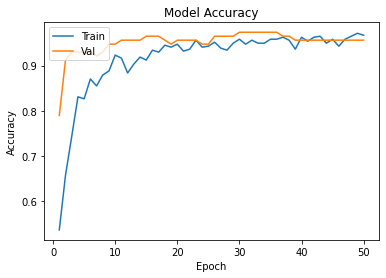

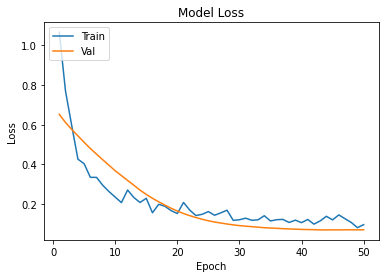

In [18]:
plot_learning(history,epochs)

In [19]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

4/4 [==============================] - 0s 5ms/step


In [20]:
y_pred

array([[0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
    

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.956140350877193

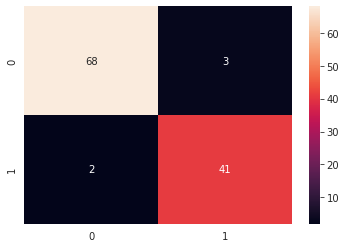

In [23]:
import seaborn as sns
sns.set_style("white")
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)

In [24]:
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]
FPFN = FP+FN
TPTN = TP+TN
Accuracy = 1/(1+(FPFN/TPTN))
print("Our_Accuracy_Score:",Accuracy)
Precision = 1/(1+(FP/TP))
print("Our_Precision_Score:",Precision)
Sensitivity = 1/(1+(FN/TP))
print("Our_Sensitivity_Score:",Sensitivity)
Specificity = 1/(1+(FP/TN))
print("Our_Specificity_Score:",Specificity)

Our_Accuracy_Score: 0.9561403508771931
Our_Precision_Score: 0.9318181818181818
Our_Sensitivity_Score: 0.9534883720930232
Our_Specificity_Score: 0.9577464788732394
